In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'LT.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,40.111111,40.724445,40.111111,40.435555,30.374678,3709080
2002-07-02,40.555553,40.933334,40.444443,40.533333,30.448120,2500024
2002-07-03,40.688889,40.755554,40.022221,40.080002,30.107586,1910772
2002-07-04,40.244446,40.377777,39.835556,39.924442,29.990732,1515924
2002-07-05,39.799999,40.222221,39.799999,40.022221,30.064177,1038928
...,...,...,...,...,...,...
2024-06-20,3584.949951,3613.300049,3564.600098,3594.449951,3594.449951,2618715
2024-06-21,3604.050049,3610.000000,3516.000000,3535.000000,3535.000000,4508508
2024-06-24,3520.350098,3567.000000,3505.000000,3531.600098,3531.600098,2330559


In [53]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(1000, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

[array([0.00141888, 0.0014442 , 0.00132682, 0.00128655, 0.00131186,
       0.00151094, 0.00146491, 0.00143614, 0.00134639, 0.00139817,
       0.00136365, 0.00132107, 0.00124627, 0.00131186, 0.0013671 ,
       0.00065593, 0.00064212, 0.00057308, 0.0003832 , 0.00033947])]
[0.00023590473248299992]

[array([0.00141888, 0.0014442 , 0.00132682, 0.00128655, 0.00131186,
       0.00151094, 0.00146491, 0.00143614, 0.00134639, 0.00139817,
       0.00136365, 0.00132107, 0.00124627, 0.00131186, 0.0013671 ,
       0.00065593, 0.00064212, 0.00057308, 0.0003832 , 0.00033947]), array([0.0014442 , 0.00132682, 0.00128655, 0.00131186, 0.00151094,
       0.00146491, 0.00143614, 0.00134639, 0.00139817, 0.00136365,
       0.00132107, 0.00124627, 0.00131186, 0.0013671 , 0.00065593,
       0.00064212, 0.00057308, 0.0003832 , 0.00033947, 0.0002359 ])]
[0.00023590473248299992, 0.00010702047997726734]

Epoch 1/10
517/517 [==============================] - 235s 439ms/step - loss: 2.8297e-04
Epoch 2/10
517/517 [===

In [54]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

162/162 [==============================] - 30s 134ms/step


0.9984052117355504

In [55]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 2s 171ms/step


0.9779562852090725

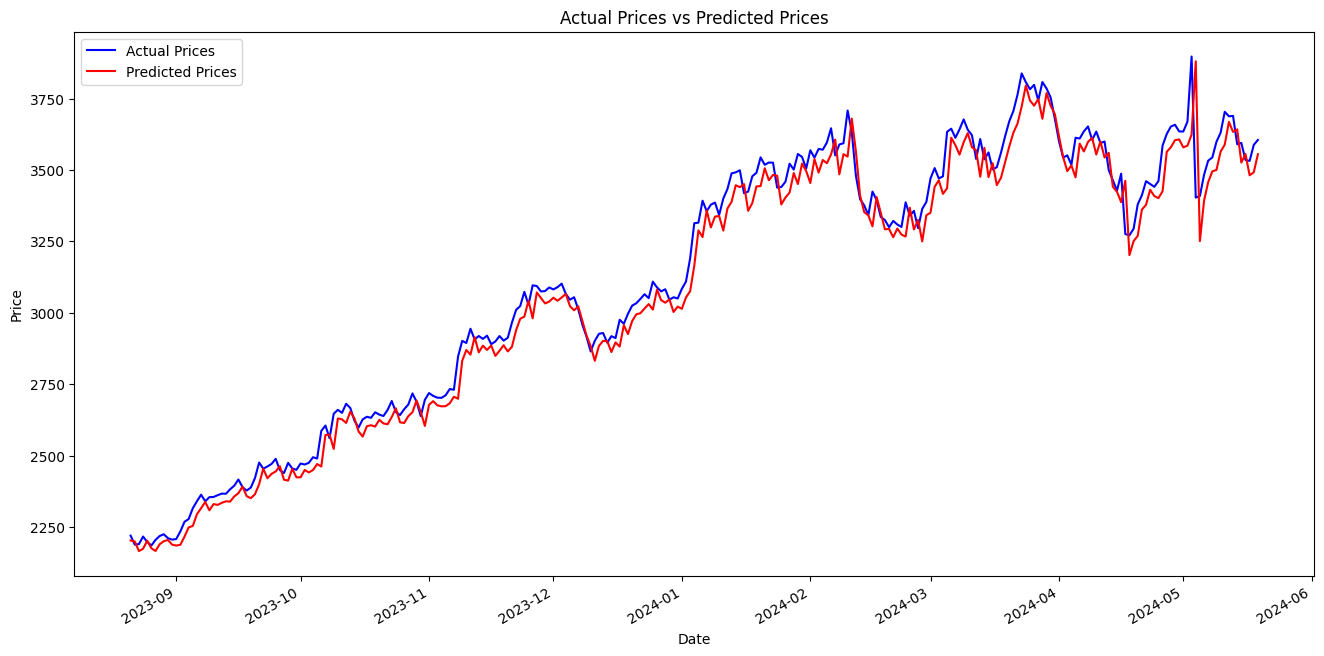

In [56]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [57]:
import joblib


model_file_path = '8.joblib'
scaler_file_path = 'scaler8.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 8.joblib
Scaler saved to scaler8.joblib
